In [4]:
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import numpy as np
import pandas as pd

# Understand the Celeba dataset

In [7]:
# Image Paths
image_paths = sorted(glob("..\..\celeba dataset\img_align_celeba\img_align_celeba" + "\*.jpg"))

In [8]:
image_paths

['..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000001.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000002.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000003.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000004.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000005.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000006.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000007.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000008.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000009.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000010.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000011.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000012.jpg',
 '..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000013.jpg',
 '..\\..\\celeba dataset\

In [9]:
print(f"Total Number of Images : {len(image_paths)}")

Total Number of Images : 202599


In [10]:
image_paths[0]

'..\\..\\celeba dataset\\img_align_celeba\\img_align_celeba\\000001.jpg'

In [17]:
img = plt.imread(image_paths[0])/255
np.max(img)

1.0

## Load a sample image image

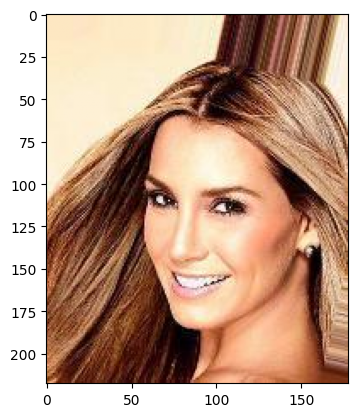

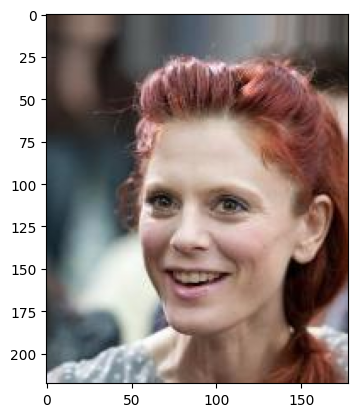

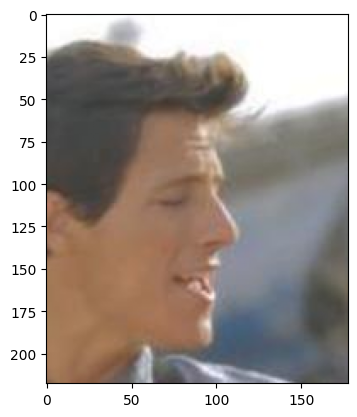

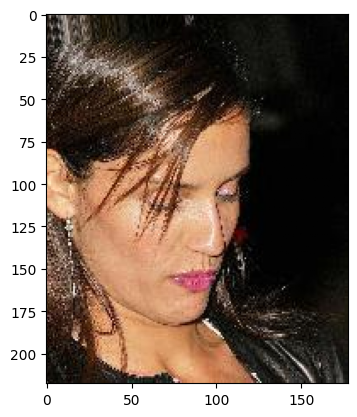

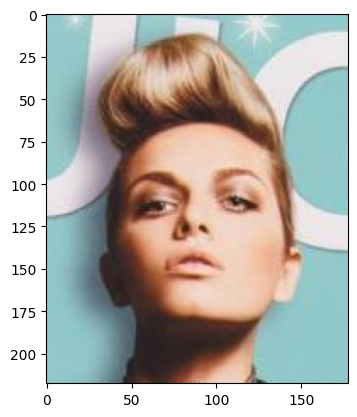

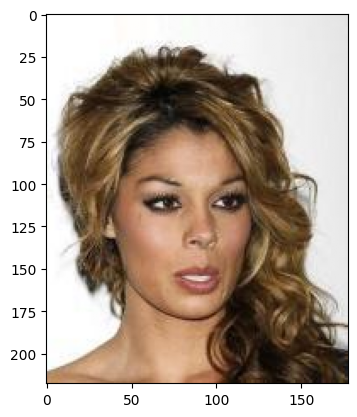

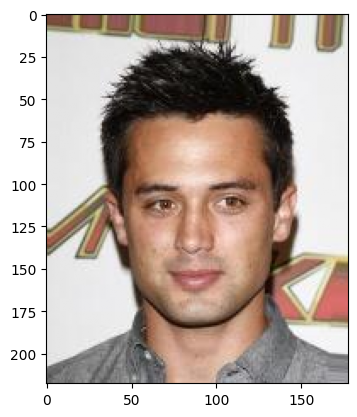

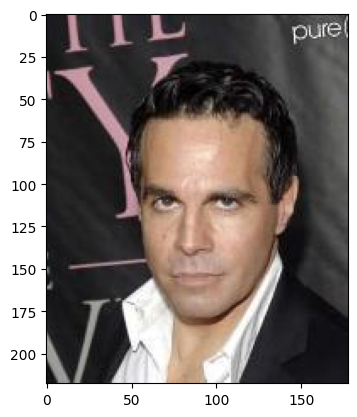

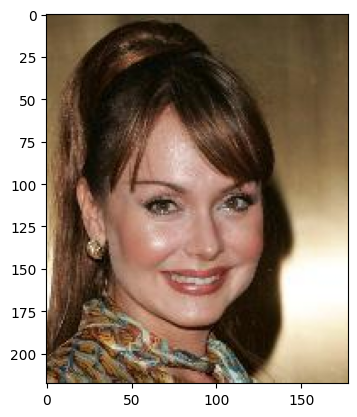

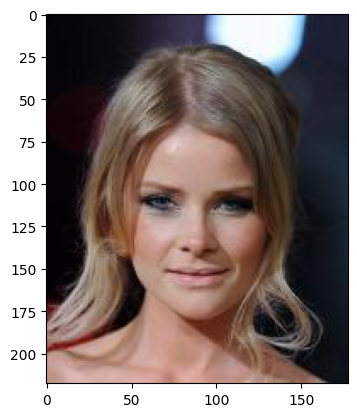

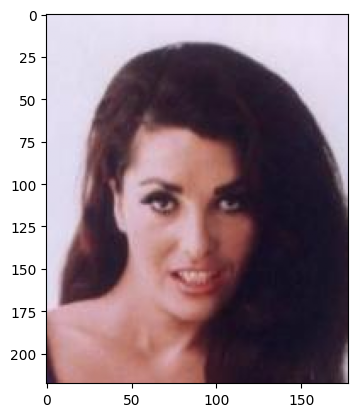

In [19]:
counter = 0
for path in image_paths:
    if counter > 10:
        break
    image = plt.imread(path)/255
    plt.imshow(image)
    plt.show()
    
    counter += 1

In [21]:
def load_image(path):
    image = plt.imread(path)/255
    return image
def visualise(img):
    plt.imshow(img)

In [22]:
max_num = 100
images = []
for idx, path in enumerate(image_paths):
    if idx < max_num:
        images.append(load_image(path))
    else:
        break

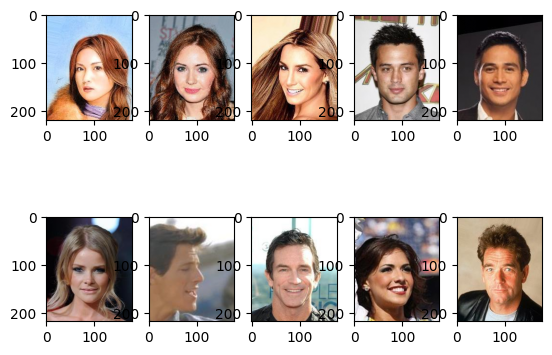

In [30]:
for i in range(10):
    idx = np.random.randint(len(images))
    plt.subplot(2,5,i+1)
    visualise(images[idx])

# Use Annotation CSV Files to annotate and to retrieve relevant images

Let's load the accompanied csv files

In [33]:
list_landmarks_align_celeba = pd.read_csv('..\..\celeba dataset\list_landmarks_align_celeba.csv')[:max_num]
list_landmarks_align_celeba.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [34]:
list_attr_celeba = pd.read_csv('..\..\celeba dataset\list_attr_celeba.csv')[:max_num]
list_attr_celeba.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [35]:
list_bbox_celeba = pd.read_csv('..\..\celeba dataset\list_bbox_celeba.csv')[:max_num]
list_bbox_celeba.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [36]:
list_eval_partition = pd.read_csv('..\..\celeba dataset\list_eval_partition.csv')[:max_num]
list_eval_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


Use the attributes to extract certain celebs with certain attributes, e.g., young, bald, etc!

In [41]:
# bald, Wearing_Hat
IDs = list_attr_celeba[list_attr_celeba['Bald'] == 1]['image_id'].tolist()
IDs

['000051.jpg', '000079.jpg']

## Load relevant images filtered based on an attribute

We will re-write the load function, however, with conditions dictated by the result list

In [42]:
images = {}
for idx, path in enumerate(image_paths):
    for ID in IDs:
        if path.__contains__(ID):
            if idx < max_num:
                images[ID] = load_image(path)
            else:
                break

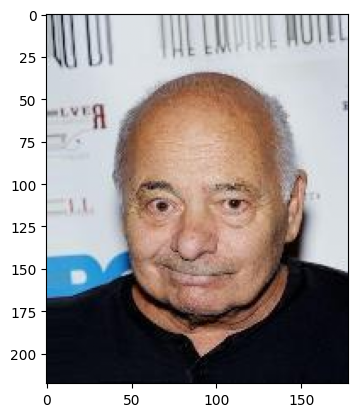

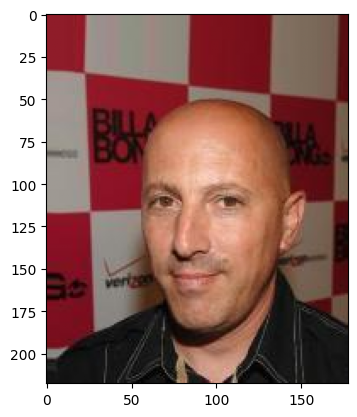

In [43]:
for key in images:
    visualise(images[key])
    plt.show()

## Annotate the bounding box in the retrieved relevant images

**listbboxceleba.csv**: Bounding box information for each image. "x1" and "y1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box

In [44]:
list_bbox_celeba.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


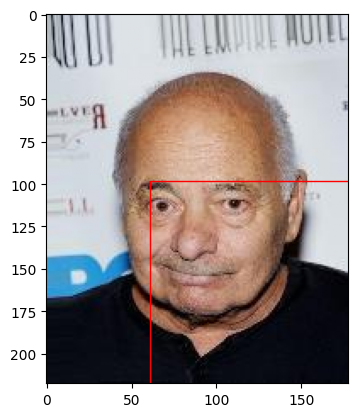

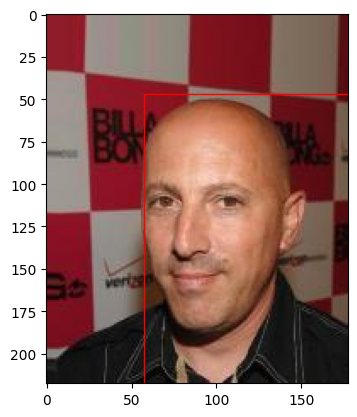

In [45]:
img_path = "..\..\celeba dataset\img_align_celeba\img_align_celeba"

for ID in IDs:
    row = list_bbox_celeba[list_bbox_celeba['image_id'] == ID]
    x_1 = row['x_1'].values[0]
    y_1 = row['y_1'].values[0]
    w = row['width'].values[0]
    h = row['height'].values[0]
    #load image
    img = load_image(img_path + '\\' + ID)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x_1, y_1), w, h, linewidth=1,
                             edgecolor='r', facecolor="none")

    # Add the patch to the Axes
    ax.add_patch(rect)